# 라이브러리 설치

In [2]:
import pandas as pd  # 파이썬에서 쓰는 데이터 분석 도구(엑셀)
import numpy as np  # 파이썬에서 쓰는 수치 연산 도구
import matplotlib.pyplot as plt  # 파이썬 시각화 도구
import seaborn as sns
import koreanize_matplotlib  # 파이썬 시각화 도구 한글 지원 도구

# 시각화 결과를 jupyter notebook 내부에 출력
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # 시각화 그래프 고해상도 출력 옵션

# 데이터 불러오기

In [3]:
crime_raw_data = pd.read_csv('seoul_crime_2021.csv', encoding='cp949')

# 데이터 전처리

## 데이터 클리닝

- null, nan, NaN, None
- 누락 데이터
- 의미 없는 데이터 확인 후 처리

In [4]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   구분          310 non-null    object 
 1   죄종          310 non-null    object 
 2   발생검거        310 non-null    object 
 3   건수          310 non-null    int64  
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(5), int64(1), object(3)
memory usage: 21.9+ KB


In [5]:
crime_raw_data.head()

,구분,죄종,발생검거,건수,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,중부,살인,발생,4,NaN,NaN,NaN,NaN,NaN
1,중부,살인,검거,4,NaN,NaN,NaN,NaN,NaN
2,중부,강도,발생,3,NaN,NaN,NaN,NaN,NaN
3,중부,강도,검거,3,NaN,NaN,NaN,NaN,NaN
4,중부,"강간,추행",발생,109,NaN,NaN,NaN,NaN,NaN


In [6]:
# 죄종 컬럼의 유니크 값 확인

crime_raw_data['죄종'].unique()

array(['살인', '강도', '강간,추행', '절도', '폭력', '강간'], dtype=object)

In [7]:
crime_raw_data['죄종'] = crime_raw_data['죄종'].replace(['강간,추행','강간'],'성범죄')

In [8]:
crime_raw_data['죄종'].unique()

array(['살인', '강도', '성범죄', '절도', '폭력'], dtype=object)

In [9]:
# NaN 값이 있는 열 삭제

crime_raw_data.dropna(axis=1, inplace=True)

In [10]:
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,4
1,중부,살인,검거,4
2,중부,강도,발생,3
3,중부,강도,검거,3
4,중부,성범죄,발생,109


## pivot table

In [11]:
# 경찰서별 죄종, 발생검거의 각 건수

crime_station = pd.pivot_table(data=crime_raw_data, index='구분',columns=['죄종','발생검거'])

In [12]:
crime_station.head()

건수                                           
죄종    강도     살인     성범죄        절도          폭력      
발생검거  검거  발생 검거 발생   검거   발생   검거    발생    검거    발생
구분                                                 
강남    11  13  6  8  325  428  737  1517  1699  1961
강동     6   6  3  3  103  124  889  1612  1461  1713
강북     1   1  4  4  115  136  537   777  1255  1383
강서     3   3  7  9  188  246  921  1540  1925  2098
관악     6   7  4  8  269  321  929  1860  1926  2248

In [13]:
crime_station.columns

MultiIndex([('건수',  '강도', '검거'),
            ('건수',  '강도', '발생'),
            ('건수',  '살인', '검거'),
            ('건수',  '살인', '발생'),
            ('건수', '성범죄', '검거'),
            ('건수', '성범죄', '발생'),
            ('건수',  '절도', '검거'),
            ('건수',  '절도', '발생'),
            ('건수',  '폭력', '검거'),
            ('건수',  '폭력', '발생')],
           names=[None, '죄종', '발생검거'])

In [14]:
# 3줄의 컬럼 중, '건수' 컬럼 삭제

crime_station.columns = crime_station.columns.droplevel(0)

In [15]:
crime_station.head()

죄종    강도     살인     성범죄        절도          폭력      
발생검거  검거  발생 검거 발생   검거   발생   검거    발생    검거    발생
구분                                                 
강남    11  13  6  8  325  428  737  1517  1699  1961
강동     6   6  3  3  103  124  889  1612  1461  1713
강북     1   1  4  4  115  136  537   777  1255  1383
강서     3   3  7  9  188  246  921  1540  1925  2098
관악     6   7  4  8  269  321  929  1860  1926  2248

In [16]:
crime_station.columns

MultiIndex([( '강도', '검거'),
            ( '강도', '발생'),
            ( '살인', '검거'),
            ( '살인', '발생'),
            ('성범죄', '검거'),
            ('성범죄', '발생'),
            ( '절도', '검거'),
            ( '절도', '발생'),
            ( '폭력', '검거'),
            ( '폭력', '발생')],
           names=['죄종', '발생검거'])

In [17]:
# 다중컬럼 정리
# 죄종 + 발생검거로 하나의 컬럼 생성

crime_station.columns = crime_station.columns.get_level_values(0) + crime_station.columns.get_level_values(1)

In [18]:
crime_station.head()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,11,13,6,8,325,428,737,1517,1699,1961
강동,6,6,3,3,103,124,889,1612,1461,1713
강북,1,1,4,4,115,136,537,777,1255,1383
강서,3,3,7,9,188,246,921,1540,1925,2098
관악,6,7,4,8,269,321,929,1860,1926,2248


## 구 컬럼 생성

- 경찰서별 담당 행정 구역 컬럼 생성
- 컬럼 생성 후 인덱스로 설정

In [19]:
real_gu = {
'종로구':['종로', '혜화'], '중구':['남대문', '중부'],
'용산구':['용산'], '성동구':['성동'],
'광진구':['광진'], '동대문구':['동대문'],
'중랑구':['중랑'], '성북구':['성북', '종암'],
'강북구':['강북'], '도봉구':['도봉'],
'노원구':['노원'], '은평구':['서부', '은평'],
'서대문구':['서대문'], '마포구':['마포'],
'양천구':['양천'], '강서구':['강서'],
'구로구':['구로'], '금천구':['금천'],
'영등포구':['영등포'], '동작구':['동작'],
'관악구':['관악'], '서초구':['방배', '서초'],
'강남구':['강남', '수서'], '송파구':['송파'],
'강동구':['강동']
}

In [20]:
crime_station.index

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='구분')

In [21]:
tmp_gu = []

for station in crime_station.index:
    for gu_name, station_name in real_gu.items():
        if station in station_name:
            tmp_gu.append(gu_name)

In [22]:
len(crime_station) == len(tmp_gu)

True

In [23]:
crime_station['구'] = tmp_gu

In [24]:
crime_station.head()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,구
구분,,,,,,,,,,,
강남,11,13,6,8,325,428,737,1517,1699,1961,강남구
강동,6,6,3,3,103,124,889,1612,1461,1713,강동구
강북,1,1,4,4,115,136,537,777,1255,1383,강북구
강서,3,3,7,9,188,246,921,1540,1925,2098,강서구
관악,6,7,4,8,269,321,929,1860,1926,2248,관악구


In [25]:
crime_gu = pd.pivot_table(data=crime_station, index='구', aggfunc='sum')

In [26]:
crime_gu.head()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,23,25,11,12,454,578,1160,2372,2749,3159
강동구,6,6,3,3,103,124,889,1612,1461,1713
강북구,1,1,4,4,115,136,537,777,1255,1383
강서구,3,3,7,9,188,246,921,1540,1925,2098
관악구,6,7,4,8,269,321,929,1860,1926,2248


In [27]:
# 살인이 많이 일어난 상위 10개 구

crime_gu['살인발생'].sort_values(ascending=False).head(10)

구
강남구     12
서초구      9
강서구      9
관악구      8
영등포구     8
금천구      7
중구       6
노원구      6
종로구      6
광진구      5
Name: 살인발생, dtype: int64

## 검거율 컬럼 생성

In [28]:
arrest_col = ['강도검거','살인검거','성범죄검거','절도검거','폭력검거']
occur_col = ['강도발생','살인발생','성범죄발생','절도발생','폭력발생']
arrest_rate = ['강도검거율','살인검거율','성범죄검거율','절도검거율','폭력검거율']

In [29]:
# 범죄 검거 / 범죄 발생

result = np.round(crime_gu[arrest_col].div(crime_gu[occur_col].values) * 100,2)

In [30]:
crime_gu[arrest_rate] = result

In [31]:
crime_gu.head()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,23,25,11,12,454,578,1160,2372,2749,3159,92.00,91.67,78.55,48.90,87.02
강동구,6,6,3,3,103,124,889,1612,1461,1713,100.00,100.00,83.06,55.15,85.29
강북구,1,1,4,4,115,136,537,777,1255,1383,100.00,100.00,84.56,69.11,90.74
강서구,3,3,7,9,188,246,921,1540,1925,2098,100.00,77.78,76.42,59.81,91.75
관악구,6,7,4,8,269,321,929,1860,1926,2248,85.71,50.00,83.80,49.95,85.68


In [32]:
# 결과를 확인해보면, 100이 넘는 값이 있다. 이유가 뭘까?

crime_gu[crime_gu['강도검거율'] > 100]

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
금천구,4,3,6,7,103,134,520,1013,1108,1282,133.33,85.71,76.87,51.33,86.43
동대문구,8,7,4,3,147,169,659,1240,1295,1540,114.29,133.33,86.98,53.15,84.09
중랑구,7,6,4,4,117,141,835,1399,1442,1660,116.67,100.00,82.98,59.69,86.87


In [33]:
# 범죄발생 값 보다, 검거 값이 더 높은 경우가 있다는 것을 확인

crime_gu.loc['중랑구','강도검거'] / crime_gu.loc['중랑구','강도발생'] 

1.1666666666666667

In [34]:
# 100이 넘는 값이 있으면, 100으로 수정

crime_gu[crime_gu[arrest_rate] > 100] = 100

In [35]:
crime_gu.tail()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
용산구,1,1,2,3,103,141,484,945,1069,1291,100.0,66.67,73.05,51.22,82.80
은평구,3,3,5,4,133,166,825,1424,1457,1647,100.0,100.00,80.12,57.94,88.46
종로구,4,4,3,6,102,156,504,1079,1188,1467,100.0,50.00,65.38,46.71,80.98
중구,6,6,6,6,97,161,739,1279,1224,1409,100.0,100.00,60.25,57.78,86.87
중랑구,7,6,4,4,117,141,835,1399,1442,1660,100.0,100.00,82.98,59.69,86.87


## 컬럼이름 수정

In [36]:
crime_gu.rename(columns={
    '강도발생' : '강도', '살인발생' : '살인', '성범죄발생' : '성범죄',
    '절도발생' : '절도', '폭력발생' : '폭력'
},inplace=True)

In [38]:
crime_gu.head()

,강도검거,강도,살인검거,살인,성범죄검거,성범죄,절도검거,절도,폭력검거,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,23,25,11,12,454,578,1160,2372,2749,3159,92.00,91.67,78.55,48.90,87.02
강동구,6,6,3,3,103,124,889,1612,1461,1713,100.00,100.00,83.06,55.15,85.29
강북구,1,1,4,4,115,136,537,777,1255,1383,100.00,100.00,84.56,69.11,90.74
강서구,3,3,7,9,188,246,921,1540,1925,2098,100.00,77.78,76.42,59.81,91.75
관악구,6,7,4,8,269,321,929,1860,1926,2248,85.71,50.00,83.80,49.95,85.68


## 검거컬럼 삭제

In [39]:
crime_gu.drop(arrest_col, axis=1, inplace=True)

In [40]:
crime_gu.head()

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,25,12,578,2372,3159,92.00,91.67,78.55,48.90,87.02
강동구,6,3,124,1612,1713,100.00,100.00,83.06,55.15,85.29
강북구,1,4,136,777,1383,100.00,100.00,84.56,69.11,90.74
강서구,3,9,246,1540,2098,100.00,77.78,76.42,59.81,91.75
관악구,7,8,321,1860,2248,85.71,50.00,83.80,49.95,85.68


## 데이터 정규화

- 서로 단위가 다른 데이터를 동일한 크기 (0~1 사이 값)로 변환

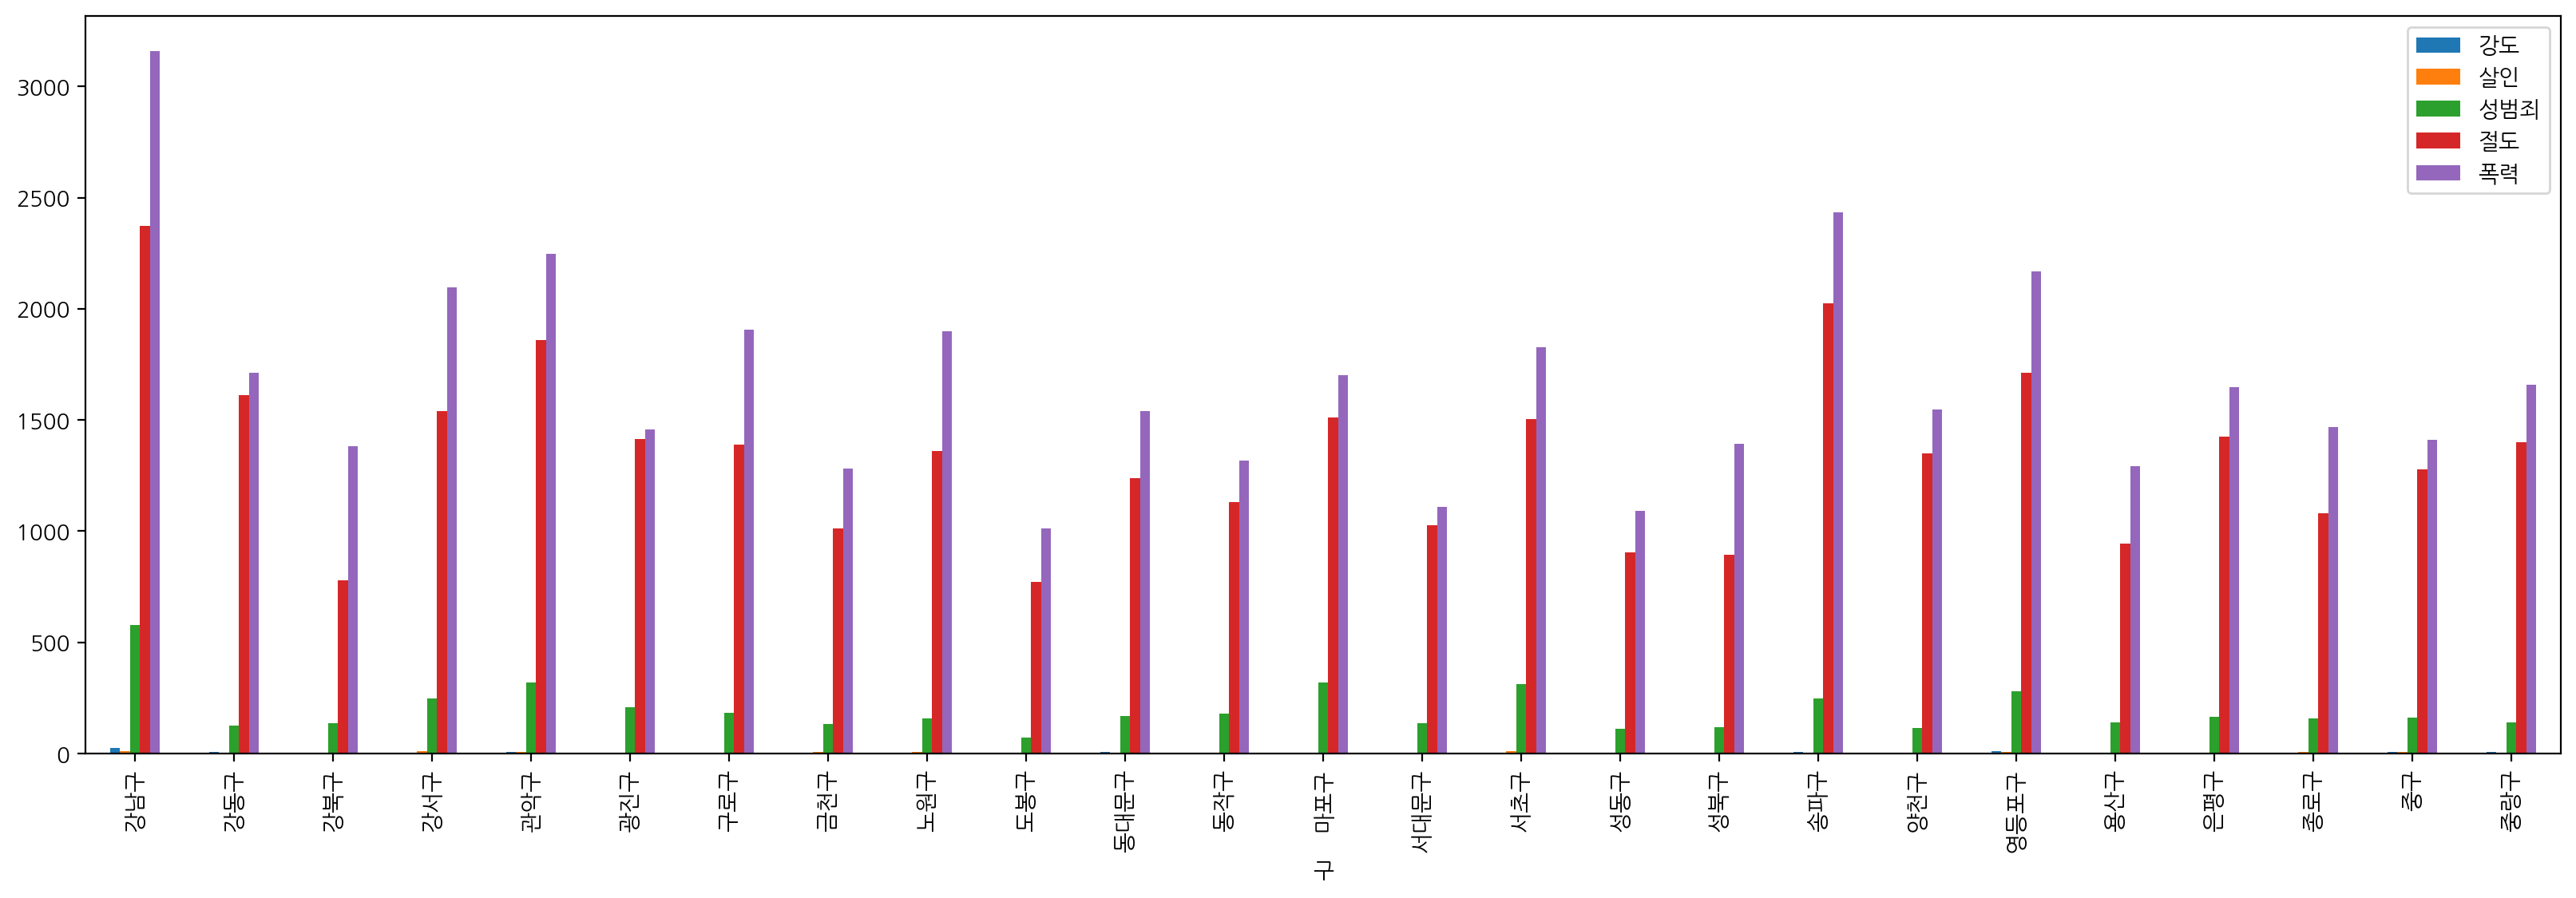

In [42]:
five_crime_list = ['강도','살인','성범죄','절도','폭력']
crime_gu[five_crime_list].plot(kind='bar',figsize=(20,6))
plt.show()

In [43]:
crime_gu[five_crime_list].max()

강도       25
살인       12
성범죄     578
절도     2372
폭력     3159
dtype: int64

In [44]:
crime_gu_norm = crime_gu[five_crime_list] / crime_gu[five_crime_list].max()
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력
구,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000
강동구,0.24,0.250000,0.214533,0.679595,0.542260
강북구,0.04,0.333333,0.235294,0.327572,0.437797
강서구,0.12,0.750000,0.425606,0.649241,0.664134
관악구,0.28,0.666667,0.555363,0.784148,0.711618


In [45]:
crime_gu_norm[arrest_rate] = crime_gu[arrest_rate]
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000,92.00,91.67,78.55,48.90,87.02
강동구,0.24,0.250000,0.214533,0.679595,0.542260,100.00,100.00,83.06,55.15,85.29
강북구,0.04,0.333333,0.235294,0.327572,0.437797,100.00,100.00,84.56,69.11,90.74
강서구,0.12,0.750000,0.425606,0.649241,0.664134,100.00,77.78,76.42,59.81,91.75
관악구,0.28,0.666667,0.555363,0.784148,0.711618,85.71,50.00,83.80,49.95,85.68


<Axes: xlabel='구'>

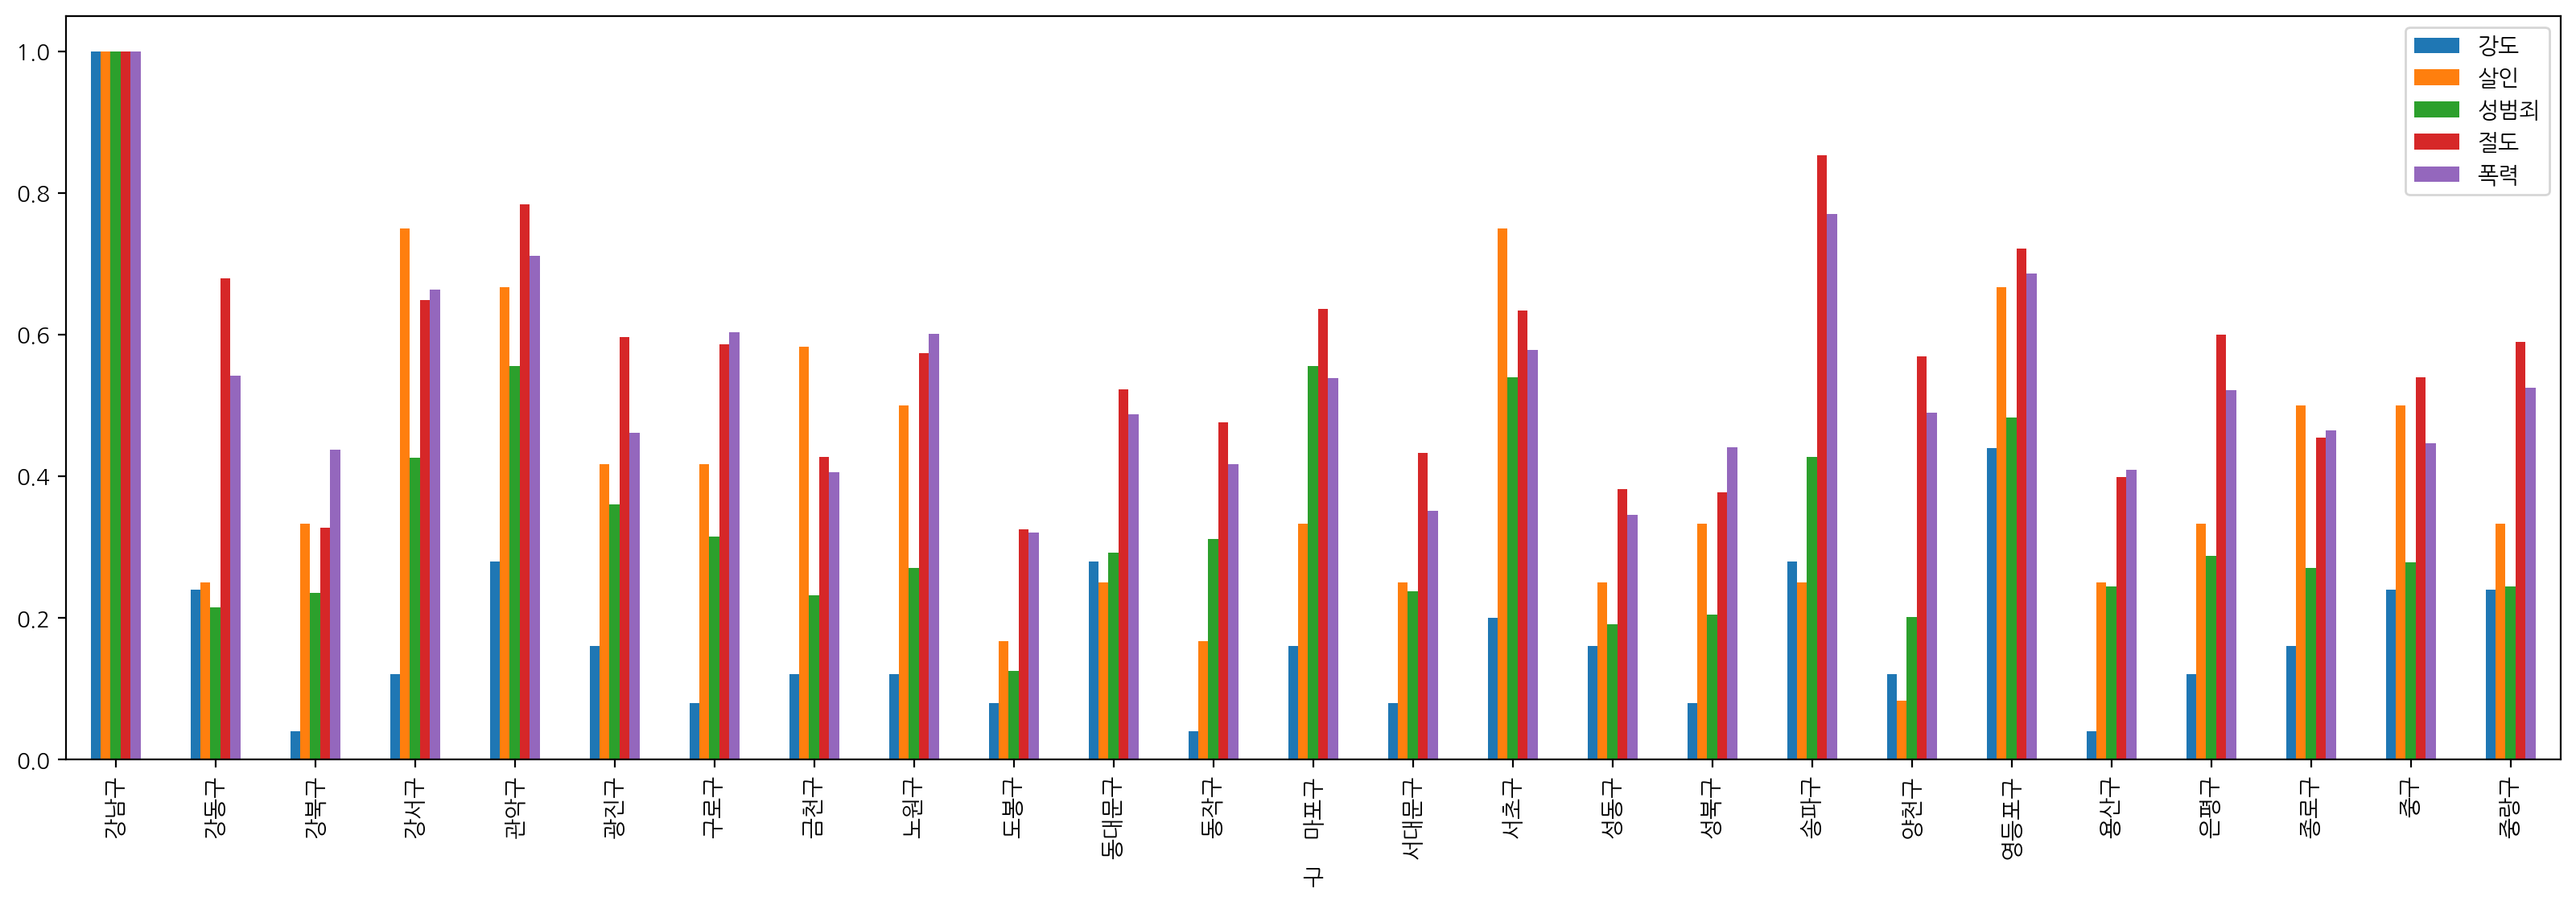

In [49]:
# 정규화 후 다시 구별 5대 범죄 형황 시각화

crime_gu_norm[five_crime_list].plot(kind='bar', figsize=(20,6))

## 범죄, 검거율 평균 컬럼 생성

In [58]:
crime_gu_norm['범죄평균'] = np.mean(crime_gu_norm[five_crime_list],axis=1)

In [59]:
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균
구,,,,,,,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000,92.00,91.67,78.55,48.90,87.02,1.000000
강동구,0.24,0.250000,0.214533,0.679595,0.542260,100.00,100.00,83.06,55.15,85.29,0.385278
강북구,0.04,0.333333,0.235294,0.327572,0.437797,100.00,100.00,84.56,69.11,90.74,0.274799
강서구,0.12,0.750000,0.425606,0.649241,0.664134,100.00,77.78,76.42,59.81,91.75,0.521796
관악구,0.28,0.666667,0.555363,0.784148,0.711618,85.71,50.00,83.80,49.95,85.68,0.599559


In [60]:
# 검거율 평균 컬럼 생성

crime_gu_norm['검거율평균']=np.mean(crime_gu_norm[arrest_rate], axis=1)

In [61]:
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균,검거율평균
구,,,,,,,,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000,92.00,91.67,78.55,48.90,87.02,1.000000,79.628
강동구,0.24,0.250000,0.214533,0.679595,0.542260,100.00,100.00,83.06,55.15,85.29,0.385278,84.700
강북구,0.04,0.333333,0.235294,0.327572,0.437797,100.00,100.00,84.56,69.11,90.74,0.274799,88.882
강서구,0.12,0.750000,0.425606,0.649241,0.664134,100.00,77.78,76.42,59.81,91.75,0.521796,81.152
관악구,0.28,0.666667,0.555363,0.784148,0.711618,85.71,50.00,83.80,49.95,85.68,0.599559,71.028


In [66]:
# 범죄 평균치로 정렬 했을 때, 서울시에서 범죄가 많이 일어난 구 상위 10개는?

crime_gu_norm['범죄평균'].sort_values(ascending=False).head(10)

구
강남구     1.000000
관악구     0.599559
영등포구    0.599546
서초구     0.540356
강서구     0.521796
송파구     0.516161
마포구     0.444750
노원구     0.412963
중구      0.400756
구로구     0.400244
Name: 범죄평균, dtype: float64

In [67]:
# 검거율 평균치로 정렬 했을 때, 서울시에서 검거율이 높은 곳 상위 10개는?

crime_gu_norm['검거율평균'].sort_values(ascending=False).head(10)

구
강북구     88.882
중랑구     85.908
은평구     85.304
동대문구    84.844
서대문구    84.820
강동구     84.700
양천구     82.916
노원구     81.698
송파구     81.282
강서구     81.152
Name: 검거율평균, dtype: float64

# 데이터 저장

In [68]:
crime_gu_norm.to_csv('crime_gu_norm_2021.csv')

# 데이터 분석

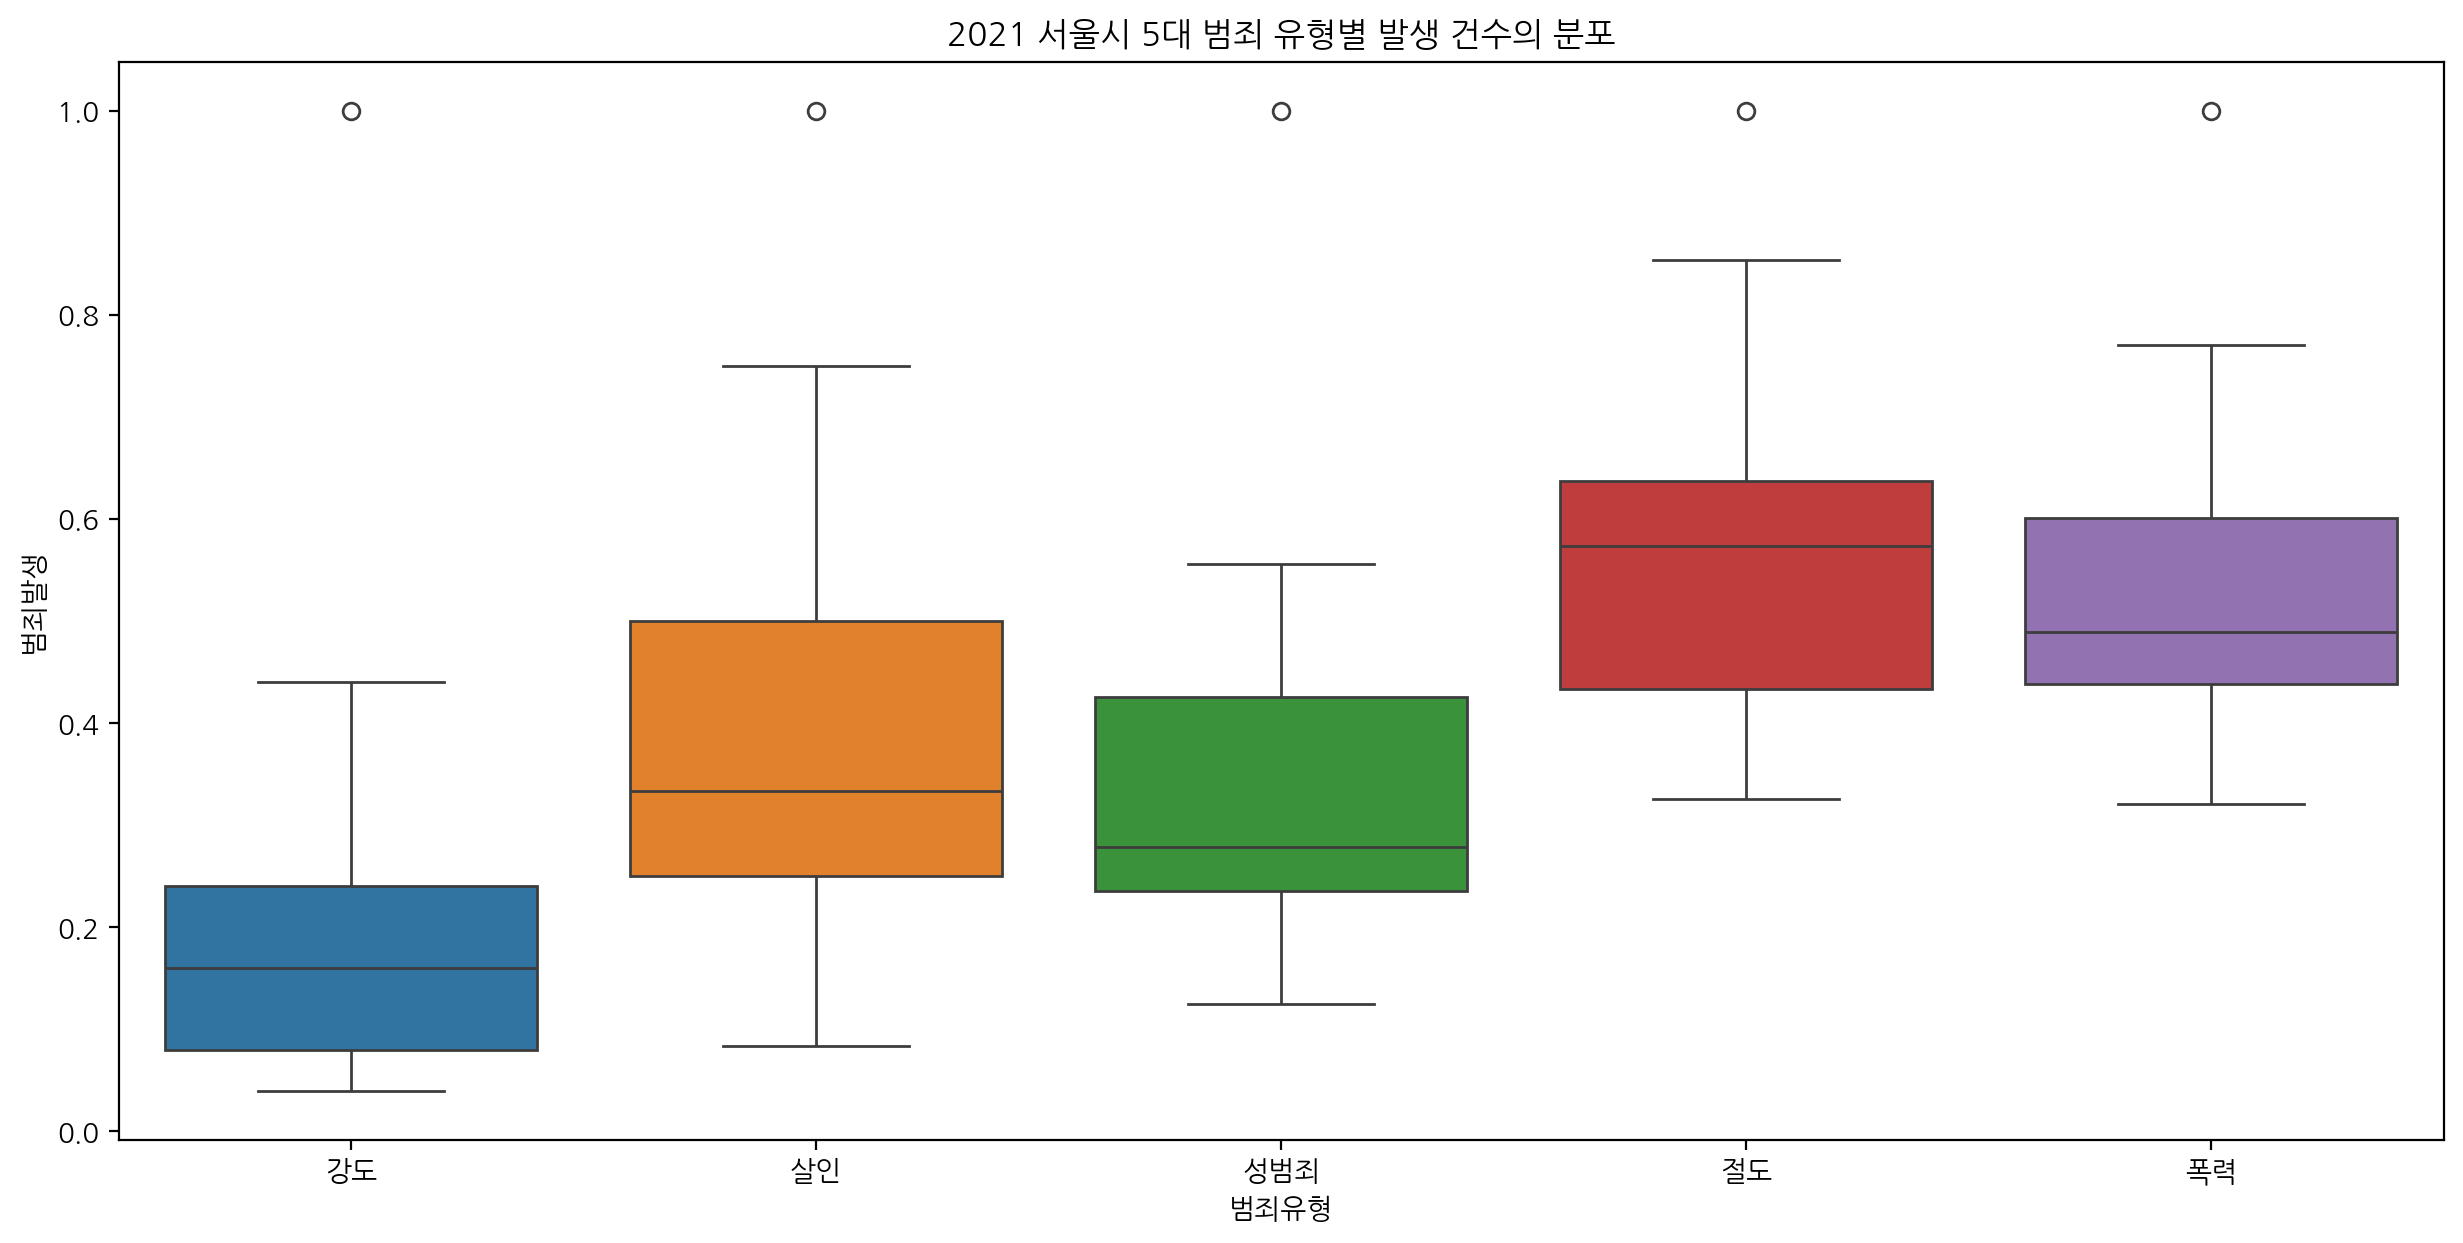

In [73]:
# Box plot

fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(data=crime_gu_norm[five_crime_list])
plt.xlabel('범죄유형')
plt.ylabel('범죄발생')
plt.title('2021 서울시 5대 범죄 유형별 발생 건수의 분포')
plt.show()

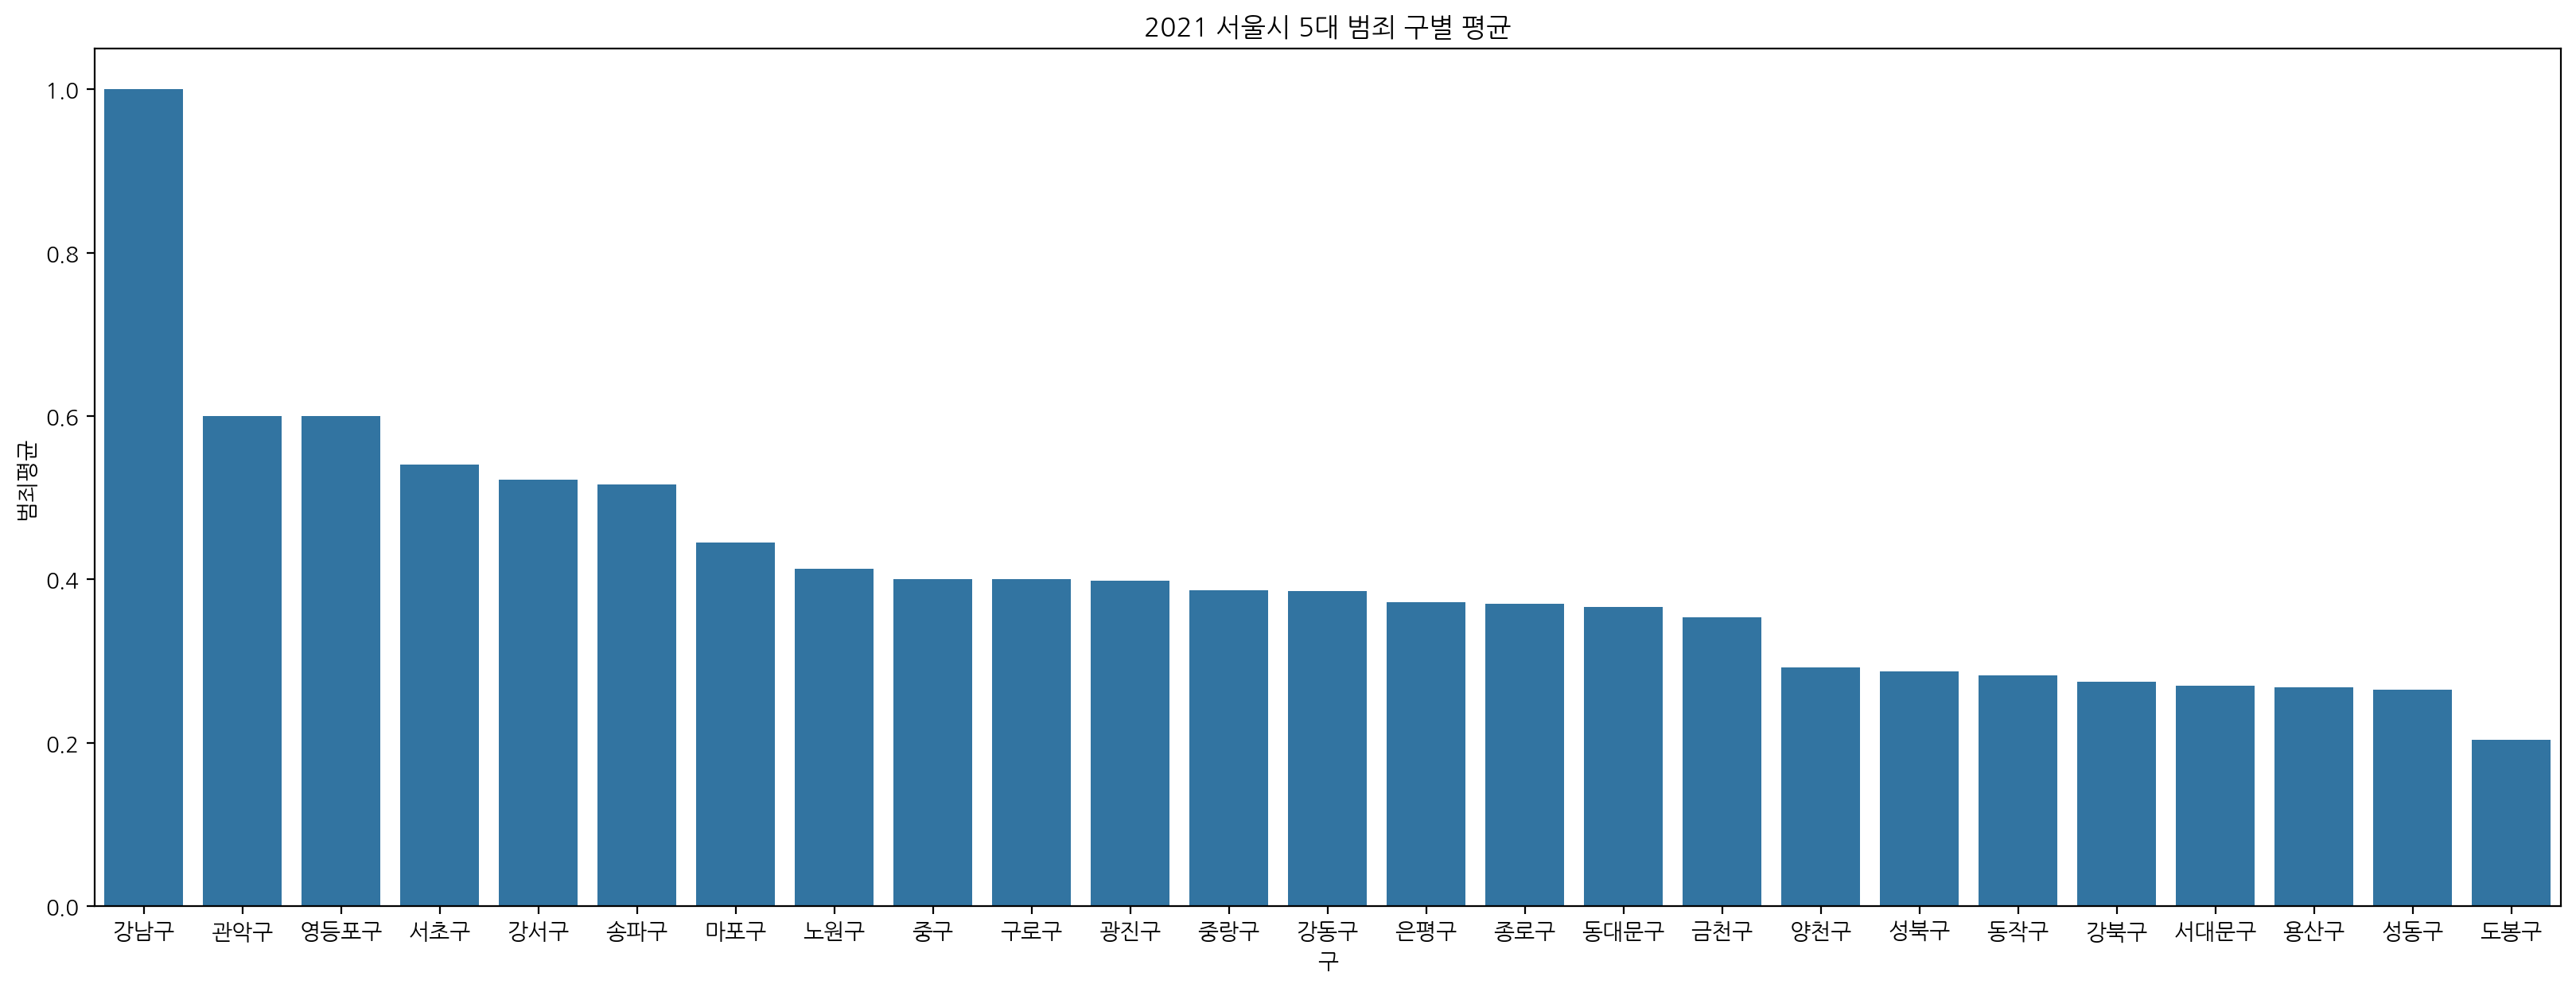

In [80]:
# Bar plot

sorted_crime_gu = crime_gu_norm.sort_values(by='범죄평균',ascending=False)
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(data=sorted_crime_gu, x=sorted_crime_gu.index, y=sorted_crime_gu['범죄평균'])
plt.title('2021 서울시 5대 범죄 구별 평균')
plt.show()

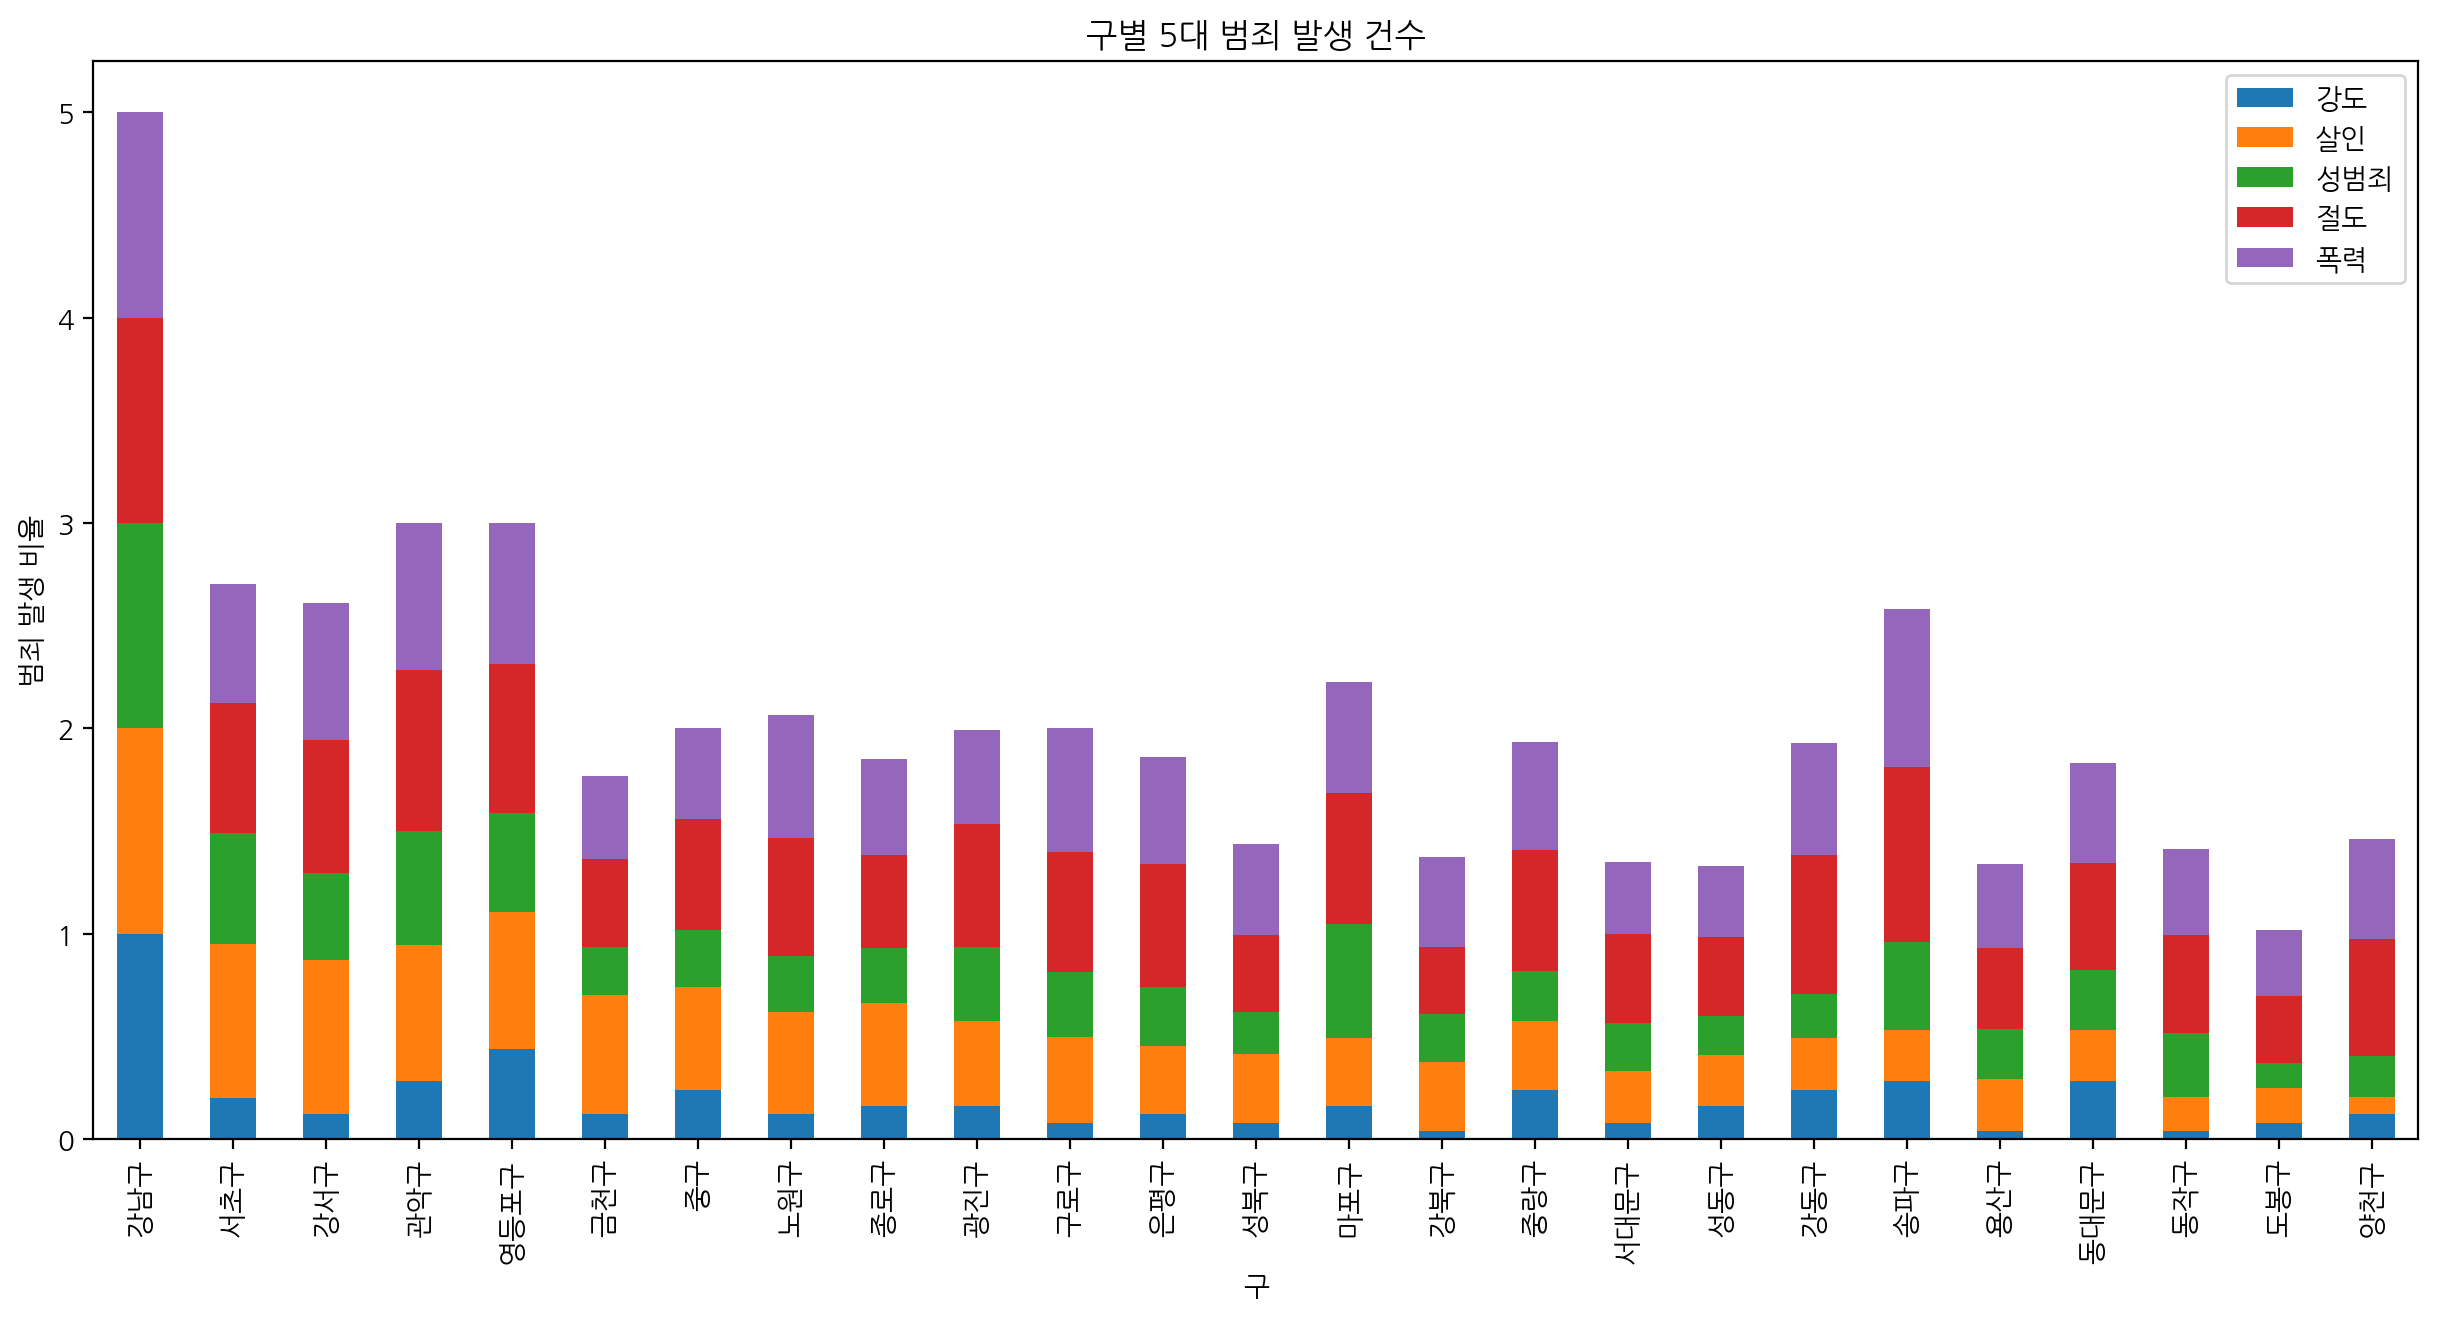

In [ ]:
# Stacked bar plot (누적 막대그래프)

stacked_crime_gu = crime_gu_norm[five_crime_list].sort_values('살인',ascending=False)
stacked_crime_gu.plot(kind='bar', stacked=True, figsize=(15,7))
plt.title('구별 5대 범죄 발생 건수')
plt.ylabel('범죄 발생 비율')
plt.show()

## 히트맵

In [82]:
target_col = ['강도','살인','성범죄','절도','폭력','범죄평균']
crime_gu_norm[target_col].sort_values(by='범죄평균',ascending=False).head()

,강도,살인,성범죄,절도,폭력,범죄평균
구,,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000,1.000000
관악구,0.28,0.666667,0.555363,0.784148,0.711618,0.599559
영등포구,0.44,0.666667,0.482699,0.721754,0.686610,0.599546
서초구,0.20,0.750000,0.539792,0.633642,0.578348,0.540356
강서구,0.12,0.750000,0.425606,0.649241,0.664134,0.521796


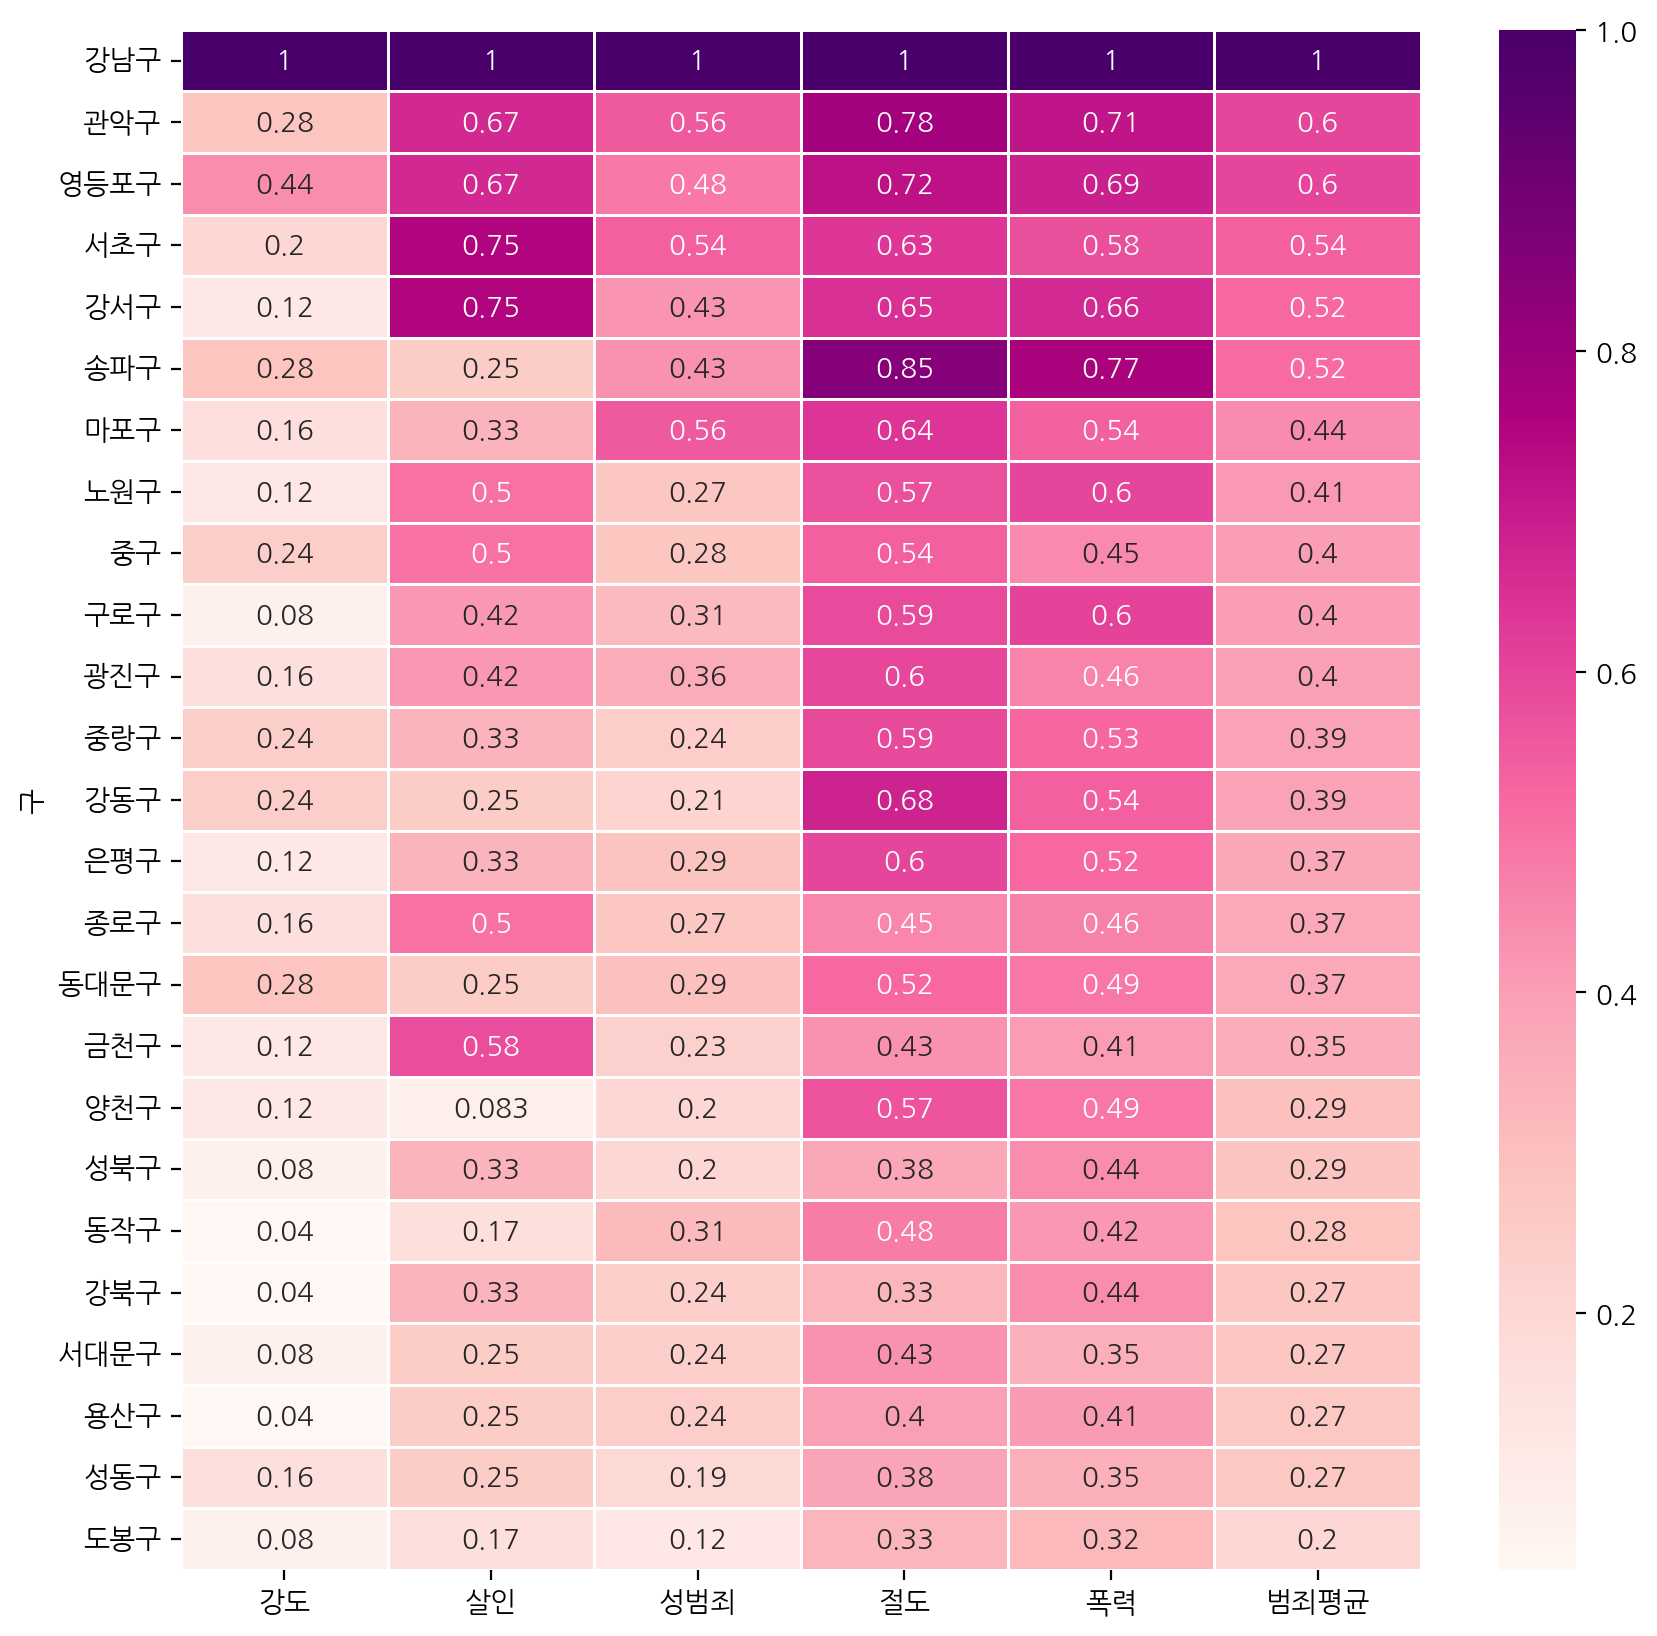

In [83]:
crime_gu_norm_sort = crime_gu_norm[target_col].sort_values(by='범죄평균',ascending=False)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(crime_gu_norm_sort, annot=True,linewidths=.5, cmap='RdPu')
plt.show()

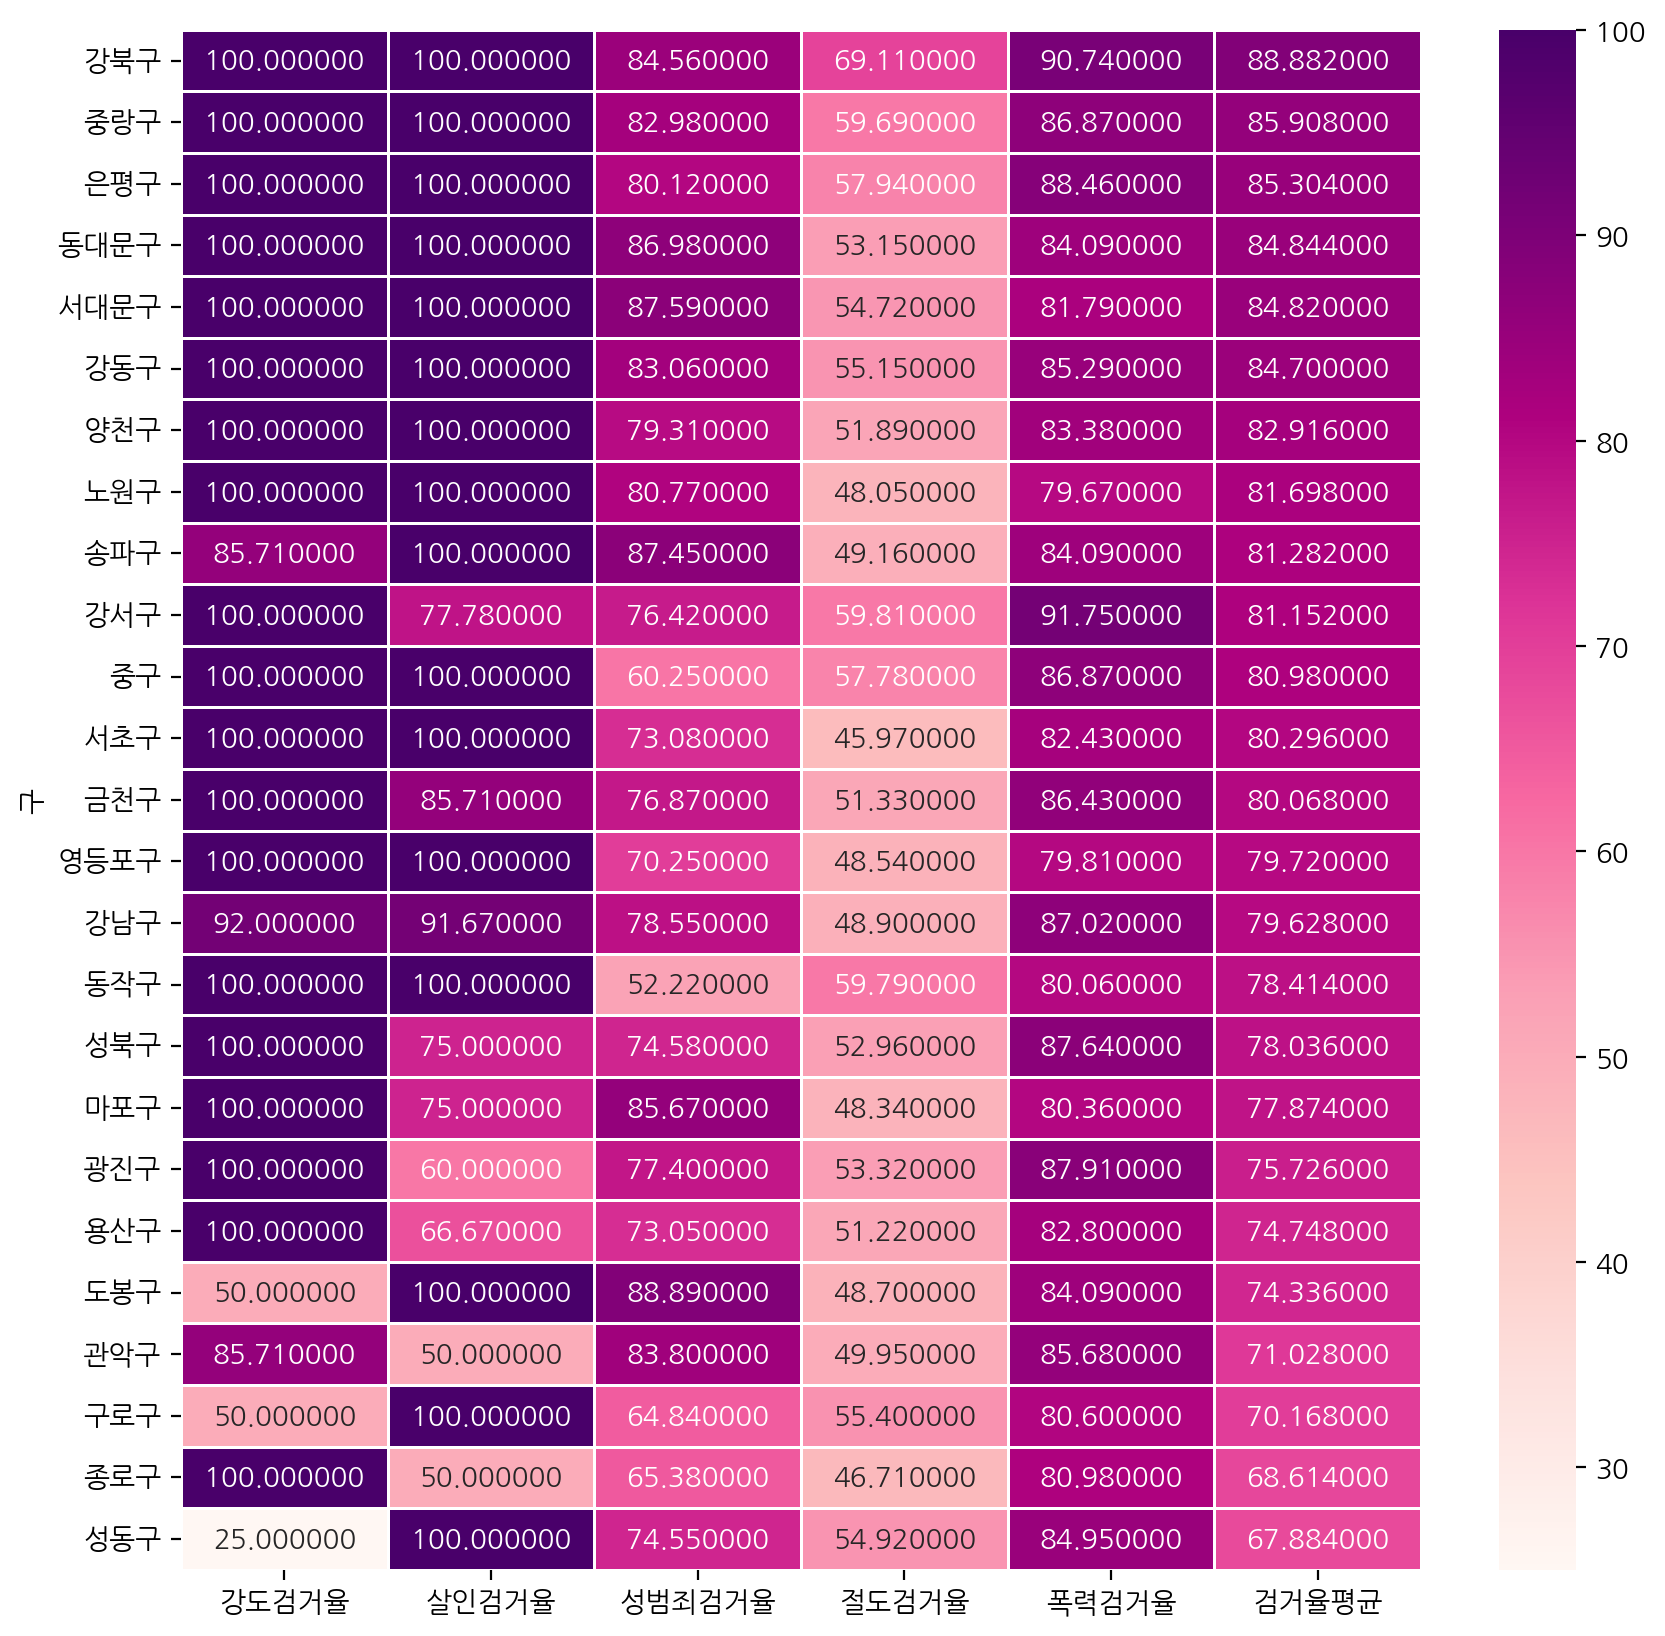

In [84]:
target_col = ['강도검거율','살인검거율','성범죄검거율','절도검거율','폭력검거율','검거율평균']
crime_gu_norm_sort = crime_gu_norm.sort_values(by='검거율평균', ascending=False)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(crime_gu_norm_sort[target_col], annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.show()

# 범죄 지도 시각화

In [85]:
import folium

In [86]:
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균,검거율평균
구,,,,,,,,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000,92.00,91.67,78.55,48.90,87.02,1.000000,79.628
강동구,0.24,0.250000,0.214533,0.679595,0.542260,100.00,100.00,83.06,55.15,85.29,0.385278,84.700
강북구,0.04,0.333333,0.235294,0.327572,0.437797,100.00,100.00,84.56,69.11,90.74,0.274799,88.882
강서구,0.12,0.750000,0.425606,0.649241,0.664134,100.00,77.78,76.42,59.81,91.75,0.521796,81.152
관악구,0.28,0.666667,0.555363,0.784148,0.711618,85.71,50.00,83.80,49.95,85.68,0.599559,71.028


In [87]:
my_map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start=11
)

my_map